# Trabajo Practico 1 - Simulación

### Ejercicio 1:
#### a) Implementar un Generador Congruencial Lineal (GCL) de módulo 2^32, multiplicador 1013904223, incremento de 1664525 y semilla igual a la parte entera del promedio de los números de padrón de los integrantes del grupo.

### Un+1 = (a * Un + c) 𝑚𝑜𝑑 m

In [2]:
a = 1013904223
c = 1664525
m = 2**32
u0 = (99139 + 99162 + 99441 + 100701) // 4

In [3]:
def gcl_a(a,c,m,u0,cant_num):
    results = [];
    for x in range(cant_num):
        u = (a * u0 + c) % m;
        u0 = u;
        results.append(u);
    return results;

#### b) Modificar el GCL implementado en el punto a) para que devuelva números al azar entre 0 y 1

In [4]:
def gcl_b(a,c,m,u0,cant_num):
    results_gcl_a = gcl_a(a,c,m,u0,cant_num);
    return [number/m for number in results_gcl_a];

#### c) Realizar los gráficos que considere necesarios para mostrar las distribuciones de números al azar generados en los puntos a) y b)

### a = (Xmax - Xmin) / (1+log2(N))

In [5]:
import math
def sturges_witdh(max,min,n):
    aux = 1 + math.log2(n);
    return (max-min) / aux;

def sturges_bins(n):
    return 1 +  math.log2(n);

In [6]:
#Defino una cantidad de numeros de 500000
cant = 500000
results_a = gcl_a(a,c,m,u0,cant)
results_b = gcl_b(a,c,m,u0,cant)
width_a = sturges_witdh(max(results_a),min(results_a),cant)
width_b = sturges_witdh(max(results_b),min(results_b),cant)
bins_a = (max(results_a) - min(results_a)) / width_a
bins_b = (max(results_b) - min(results_b)) / width_b
bins = sturges_bins(cant)
print("Ancho del intervalo para el histograma del punto a: "+str(width_a))
print("Ancho del intervalo para el histograma del punto b: "+str(width_b))
print("Cantidad de contenedores para el histograma del punto a: "+str(bins_a))
print("Cantidad de contenedores para el histograma del punto a: "+str(bins_a))
print("Cantidad de contenedores para la cantidad de muestras dada: "+str(bins))

Ancho del intervalo para el histograma del punto a: 215485318.88304016
Ancho del intervalo para el histograma del punto b: 0.05017158549349759
Cantidad de contenedores para el histograma del punto a: 19.931568569324174
Cantidad de contenedores para el histograma del punto a: 19.931568569324174
Cantidad de contenedores para la cantidad de muestras dada: 19.931568569324174


### Histogramas

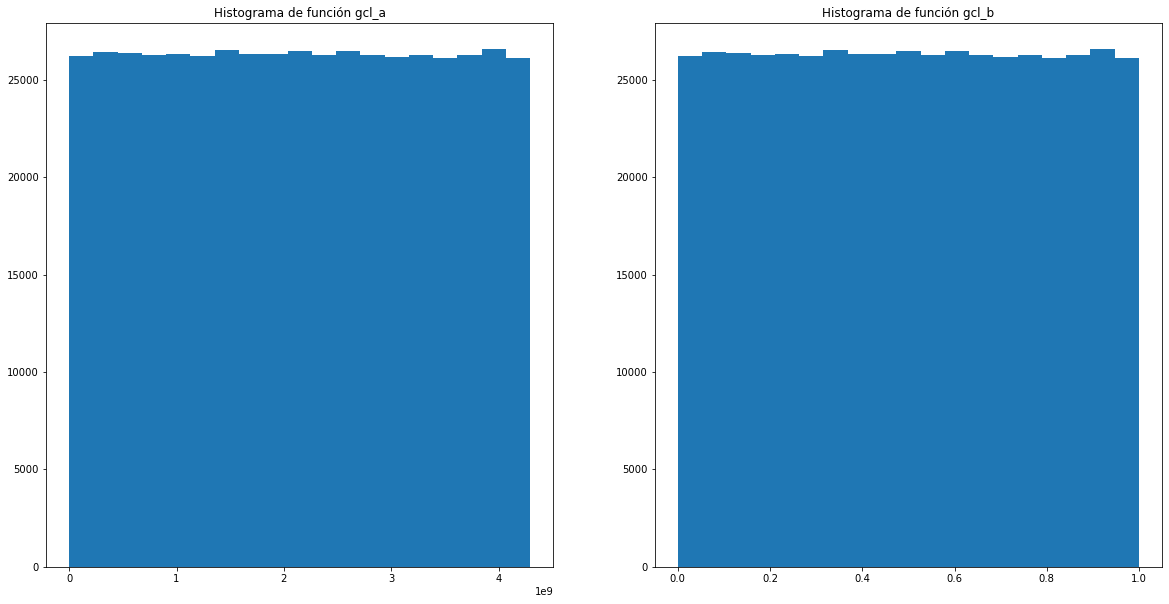

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))
ax1.hist(results_a, bins = int(bins_a))
ax1.set_title('Histograma de función gcl_a')
ax2.hist(results_b, bins = int(bins_b))
ax2.set_title('Histograma de función gcl_b')
plt.show()

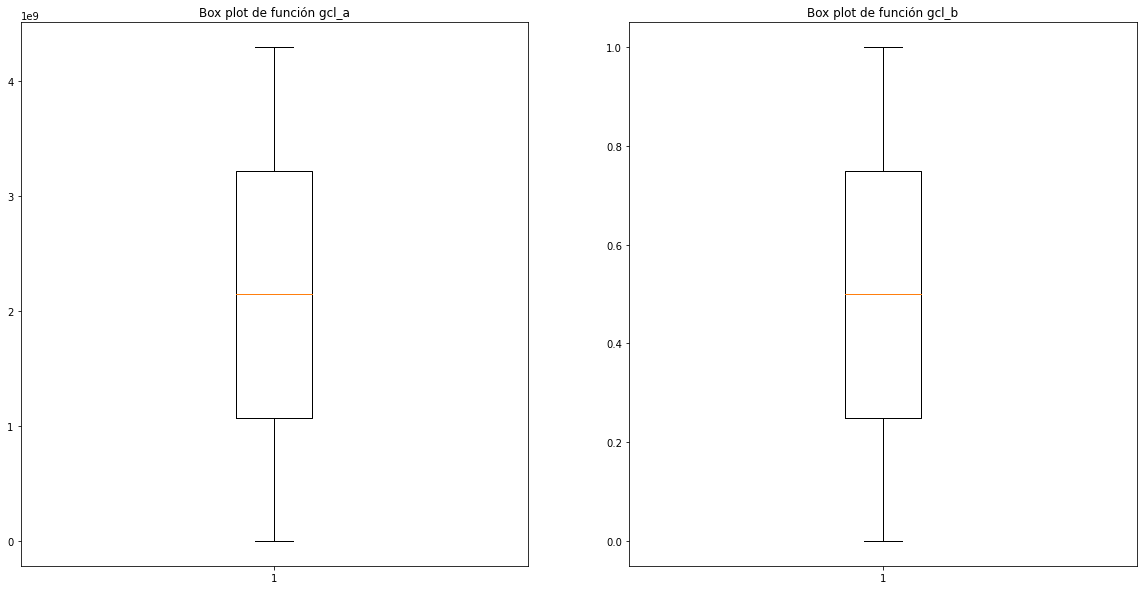

In [ ]:
fig, (ax3, ax4) = plt.subplots(1, 2,figsize=(20,10))
ax3.boxplot(results_a)
ax3.set_title('Box plot de función gcl_a')
ax4.boxplot(results_b)
ax4.set_title('Box plot de función gcl_b')
plt.show()

#### d) Basándose en el generador implementado en el ítem a, implemente el generador aditivo propuesto por Mitchell y Moore

###  Xn = ( Xn−24 + Xn−55) 𝑚𝑜𝑑 m   
#### donde 𝑥0,𝑥1,...,𝑥54 son números arbitrarios no todos iguales, n>=55 y m es par. 
##### (ver hoja 28 The Art of Computer Programming, Third Edition, Donald Knuth)

In [ ]:
 def gen_add(a,c,m,u0,cant_num):
    results = [];
    seeds = gcl_a(a,c,m,u0,55); ##x0 a x54 = 55 posiciones
    j = 24;
    k = 55;
    mod = 2**24 # dato del enunciado del punto d
    for x in range(cant_num):
        seeds[k-1] = (seeds[k-1] + seeds[j-1]) % mod;
        results.append(seeds[k-1]);
        j-=1;
        k-=1;
        if(j == 0):
            j=55;
        if(k == 0):
            k=55;
    return results;
    

In [ ]:
gen_add(a,c,m,u0,10)

[909357,
 290765,
 10003501,
 13904845,
 16672813,
 11069389,
 8334381,
 4367309,
 5959725,
 6381517]